Using the dataset for the risk of heart attack with class imbalance:

1. Create a logistic regression model and measure the performance of it.
2. By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
PATH ='/content/drive/MyDrive/Colab Notebooks/Datajarlabs/8-Classification_Problems'
os.chdir(PATH)

In [ ]:
df = pd.read_csv('cleveland.csv',sep= ';')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    object 
 12  thal      177 non-null    object 
 13  target    177 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.5+ KB


In [ ]:
for column_name in df.columns:
    print("{} unique values in column : {}".format(column_name, df[column_name].unique()[0:10]))
    print("-" * 30)

age unique values in column : [63. 37. 41. 56. 57. 44. 52. 54. 48. 49.]
------------------------------
sex unique values in column : [1. 0.]
------------------------------
cp unique values in column : [1. 3. 2. 4.]
------------------------------
trestbps unique values in column : [145. 130. 120. 140. 172. 110. 150. 135. 160. 105.]
------------------------------
chol unique values in column : [233. 250. 204. 236. 354. 192. 294. 263. 199. 239.]
------------------------------
fbs unique values in column : [1. 0.]
------------------------------
restecg unique values in column : [2. 0. 1.]
------------------------------
thalach unique values in column : [150. 187. 172. 178. 163. 148. 153. 173. 162. 160.]
------------------------------
exang unique values in column : [0. 1.]
------------------------------
oldpeak unique values in column : [2.3 3.5 1.4 0.8 0.6 0.4 1.3 0.  0.5 1.2]
------------------------------
slope unique values in column : [3. 1. 2.]
------------------------------
ca uniqu

In [ ]:
df['ca'].value_counts()

0.0       133
1.0        24
2.0         9
3.0         8
<null>      3
Name: ca, dtype: int64

In [ ]:
# change value by most repetitive
df['ca'].replace({'<null>':'0.0'}, inplace=True)
df['ca'] = df['ca'].astype('float')

In [ ]:
df['thal'].value_counts()

3.0       131
7.0        37
6.0         8
<null>      1
Name: thal, dtype: int64

In [ ]:
# change value by most repetitive
df['thal'].replace({'<null>':'3.0'}, inplace=True)
df['thal'] = df['thal'].astype('float')

In [ ]:
print(df['ca'].unique())
print(df['thal'].unique())

[0. 2. 1. 3.]
[6. 3. 7.]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    float64
 12  thal      177 non-null    float64
 13  target    177 non-null    object 
dtypes: float64(13), object(1)
memory usage: 19.5+ KB


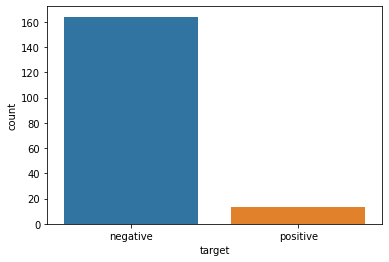

In [ ]:
sns.countplot(df.target)

In [ ]:
countNoDisease = len(df[df.target == 'negative'])
countHaveDisease = len(df[df.target == 'positive'])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 92.66%
Percentage of Patients Have Heart Disease: 7.34%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
y.value_counts()

negative    164
positive     13
Name: target, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)


In [ ]:
log_reg = LogisticRegression(max_iter= 1000)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print('Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy on Train Data : 0.99
Accuracy on Test Data  : 0.94


## 1.1. Changing Performance Measurement Metric of Model

In [ ]:
pred_train = log_reg.predict(X_train)
pred_test = log_reg.predict(X_test)

In [ ]:
print("Train Dataset")
print(classification_report(y_train, pred_train))

print('-' *30)

print("\nTest Dataset")
print(classification_report(y_test, pred_test))

Train Dataset
              precision    recall  f1-score   support

    negative       0.99      0.99      0.99       131
    positive       0.90      0.90      0.90        10

    accuracy                           0.99       141
   macro avg       0.95      0.95      0.95       141
weighted avg       0.99      0.99      0.99       141

------------------------------

Test Dataset
              precision    recall  f1-score   support

    negative       0.94      1.00      0.97        33
    positive       1.00      0.33      0.50         3

    accuracy                           0.94        36
   macro avg       0.97      0.67      0.74        36
weighted avg       0.95      0.94      0.93        36



## 1.2. Resampling Dataset

In [ ]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_model.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    return  None

### 1.2.1. Up-Sampling

In [ ]:
from sklearn.utils import resample

In [ ]:
normal = df[df.target == 'negative']
disease = df[df.target == 'positive']

disease_upsampled = resample(disease,
                              replace = True,
                              n_samples = len(normal),
                              random_state = 111)

upsampled_df = pd.concat([normal, disease_upsampled])
upsampled_df.target.value_counts()

positive    164
negative    164
Name: target, dtype: int64

In [ ]:
X = upsampled_df.drop('target', axis=1)
y = upsampled_df['target']

create_model(X,y)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

    negative       1.00      0.95      0.97       131
    positive       0.95      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test Dataset
              precision    recall  f1-score   support

    negative       1.00      0.94      0.97        33
    positive       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



### 1.2.2. Down-Sampling

In [ ]:
normal = df[df.target == 'negative']
disease = df[df.target == 'positive']

disease_downsampled = resample(normal,
                                         replace = True,
                                         n_samples = len(disease),
                                         random_state = 111)

downsampled_df = pd.concat([disease, disease_downsampled])
downsampled_df.target.value_counts()

positive    13
negative    13
Name: target, dtype: int64

In [ ]:
X = downsampled_df.drop('target', axis=1)
y = downsampled_df['target']

create_model(X,y)

Accuracy : 1.0

Train Dataset
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        10
    positive       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test Dataset
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         3
    positive       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



## 1.3. Producing Synthetic Samples

### 1.3.1. SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

y = df.target
X = df.drop('target', axis=1)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_sample(X, y)

In [ ]:
create_model(X_smote, y_smote)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

    negative       1.00      0.95      0.98       131
    positive       0.96      1.00      0.98       131

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262

Test Dataset
              precision    recall  f1-score   support

    negative       1.00      0.94      0.97        33
    positive       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



### 1.3.1. ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
y = df.target
X = df.drop('target', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)

In [ ]:
create_model(X_adasyn, y_adasyn)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

    negative       1.00      0.95      0.98       131
    positive       0.96      1.00      0.98       132

    accuracy                           0.98       263
   macro avg       0.98      0.98      0.98       263
weighted avg       0.98      0.98      0.98       263

Test Dataset
              precision    recall  f1-score   support

    negative       1.00      0.94      0.97        33
    positive       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



Down-Sampling method gave best results.